In [2]:
import pandas as pd
import geopandas as gpd

In [79]:
from shapely.geometry import Point


# GPS point
p = Point(-86.15,39.78)

# create circle
p_buff = p.buffer(.1)

# put point into df
point_frame = gpd.GeoDataFrame(pd.DataFrame({
    'input' : ['point'],
    'geometry' : p_buff
    
    
}))
      
# set point CRS
point_frame = point_frame.set_crs(epsg=4269)


In [7]:
point_frame

,input,geometry
0,point,"POLYGON ((-85.89200 39.95900, -85.89248 39.949..."


In [80]:
usa= pd.read_pickle('/Users/vinniepalazeti/Desktop/github/GPS/examples/data/storage/shape_US_data/us_states.pkl')

In [81]:
usa = usa.set_crs(epsg=4269)

In [82]:
states = gpd.sjoin(usa, point_frame,op='intersects')['GEOID'].values

In [83]:
state_data = []
for code_number in states:
    print(code_number)
    read_in = pd.read_pickle(f"/Users/vinniepalazeti/Desktop/github/GPS/examples/data/storage/shape_state_data/state_{code_number}.pkl")
    state_data.append(read_in)
    
state_data = pd.concat(state_data,axis=1)

18


In [87]:
joined = gpd.sjoin(state_data, point_frame,op='intersects')


#joined['color'] = '#C62828'

#joined.loc[len(joined)+1,['geometry','color'] ] = p_buff, '#283593'


#joined.plot(color=joined['color'],figsize=(15,15))

,GEOID,STATEFP,NAMELSAD,geometry,color
9,18097360800,18,Census Tract 3608,"POLYGON ((-86.06441 39.79630, -86.06199 39.796...",#C62828
10,18097354800,18,Census Tract 3548,"POLYGON ((-86.12139 39.78125, -86.12139 39.781...",#C62828
367,18097340300,18,Census Tract 3403,"POLYGON ((-86.25617 39.82385, -86.24958 39.823...",#C62828
368,18097340400,18,Census Tract 3404,"POLYGON ((-86.24010 39.82403, -86.23500 39.824...",#C62828
369,18097340600,18,Census Tract 3406,"POLYGON ((-86.21611 39.80970, -86.21480 39.809...",#C62828
...,...,...,...,...,...
1483,18097355900,18,Census Tract 3559,"POLYGON ((-86.14425 39.75692, -86.14414 39.757...",#C62828
1484,18097356200,18,Census Tract 3562,"POLYGON ((-86.15496 39.75425, -86.15495 39.754...",#C62828
1488,18097380700,18,Census Tract 3807,"POLYGON ((-86.17752 39.68596, -86.17752 39.686...",#C62828
1489,18097380800,18,Census Tract 3808,"POLYGON ((-86.13948 39.68676, -86.13886 39.686...",#C62828


<AxesSubplot:>

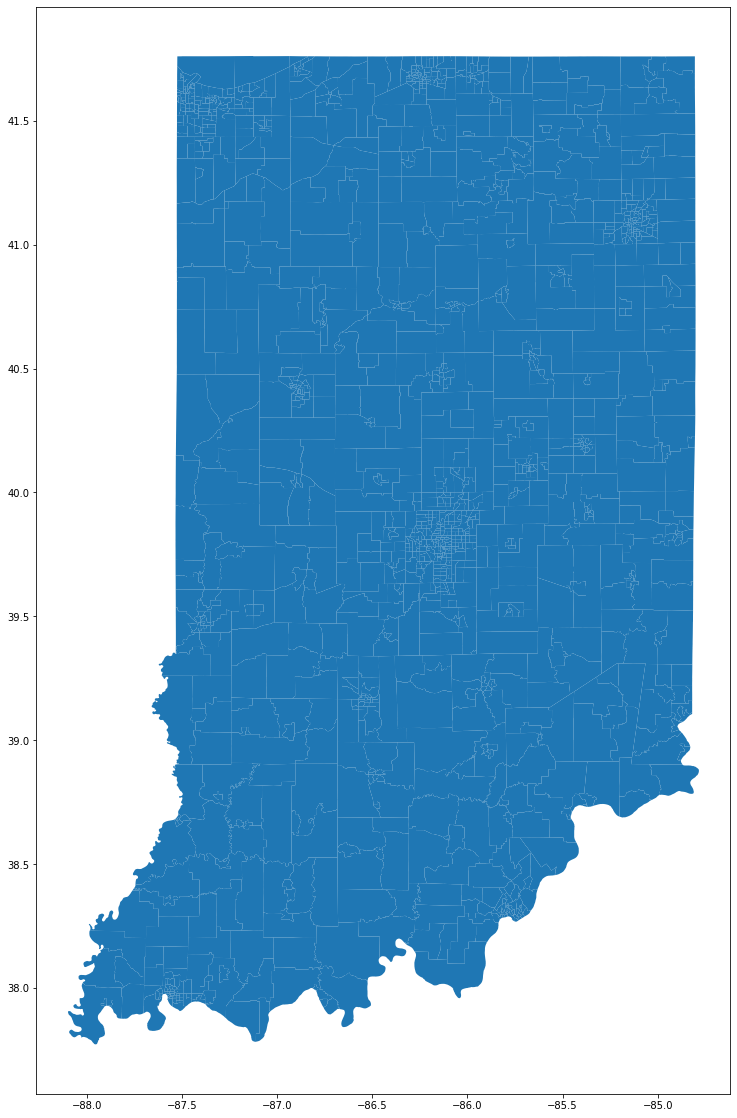

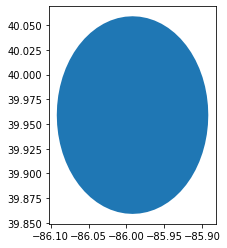

In [56]:
state_data.plot(figsize = (20,20))